In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

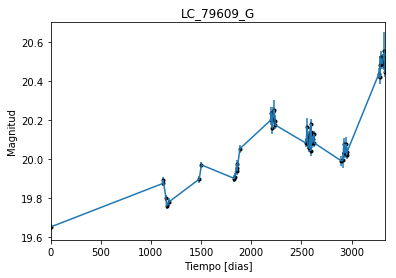

In [2]:
data = np.genfromtxt('LC_79609_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79609_G')
plt.savefig("LC_79609_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

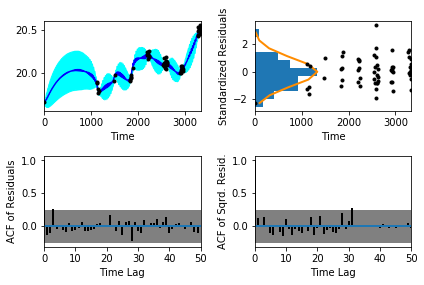

In [5]:
sample.assess_fit()

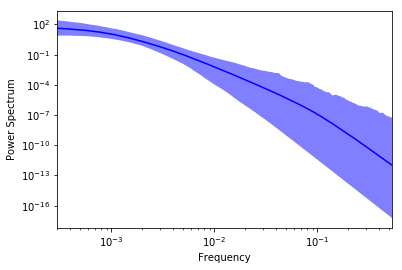

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

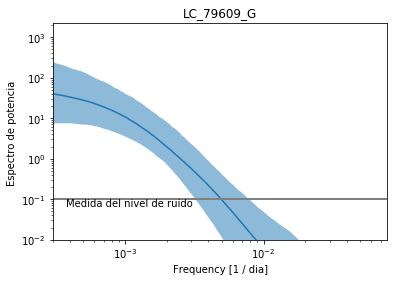

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79609_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79609_G')

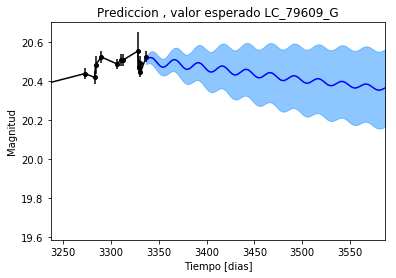

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79609_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79609_G')

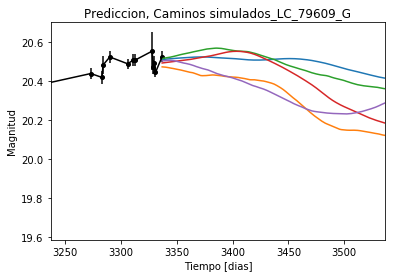

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79609_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


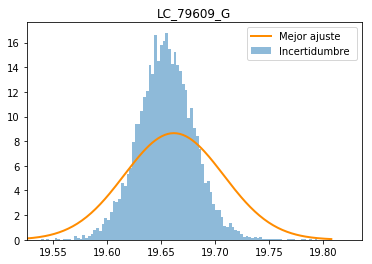

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79609_G')
plt.savefig("Mejor_ajuste_LC_79609_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79609_G')

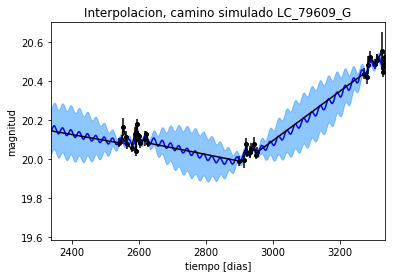

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_G')

Text(0.5,1,'Interpolacion, camino simulado LC_79609_G')

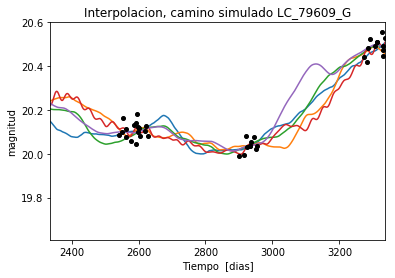

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 278.611799736
Median: 0.0142747452562
Standard deviation: 0.220422223272
68% credibility interval: [ 0.00101246  0.2683954 ]
95% credibility interval: [  3.74847827e-04   8.37299592e-01]
99% credibility interval: [  3.11109734e-04   1.00417235e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 693.73109526
Median: 0.00152470518965
Standard deviation: 0.0663625877513
68% credibility interval: [ 0.00047915  0.01577034]
95% credibility interval: [ 0.00031978  0.20160208]
99% credibility interval: [  3.04485332e-04   4.75272653e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 347.821700953
Median: 0.0116577332818
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1205.66237421
Median: 120.325297781
Standard deviation: 1.62161631622
68% credibility interval: [ 118.52397611  121.50913517]
95% credibility interval: [ 116.03186065  122.20114563]
99% credibility interval: [ 114.10362128  122.94539324]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 361.894798685
Median: 0.745743127466
Standard deviation: 2.32552719207
68% credibility interval: [ 0.04672832  4.23211097]
95% credibility interval: [ 0.01432312  7.82527818]
99% credibility interval: [  9.74921384e-03   1.08484583e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1361.09397913
Median: 0.418351791642
Standard deviation: 8.44528392494
68% credibility interval: [ 0.02682927  7.25810383]
95% credibility interval: [  1.3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 785.434887862
Median: 5.23769736075e-34
Standard deviation: 27.3595275664
68% credibility interval: [  4.04368494e-66   4.75713890e-13]
95% credibility interval: [  6.83893677e-131   4.24580927e-001]
99% credibility interval: [  1.05649330e-156   2.41326903e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3030.53248426
Median: 20.0198752127
Standard deviation: 0.155639885777
68% credibility interval: [ 19.89244143  20.15303799]
95% credibility interval: [ 19.7021215   20.31108243]
99% credibility interval: [ 19.54216369  20.54115678]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 707.433646988
Median: 0.00081066123173
Standard deviation: 0.23078247784
68% credibility interval: [ 0.         0.2699849]
95% credibility interval: [ 0.          0.85405724]
99% credibility interval: [ 0.          1.02987719]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 707.433646988
Median: 0.00081066123173
Standard deviation: 0.23078247784
68% credibility interval: [ 0.         0.2699849]
95% credibility interval: [ 0.          0.85405724]
99% credibility interval: [ 0.          1.02987719]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 625.795696879
Median: 0.0
Standard deviation: 0.000389358586868
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1205.66237421
Median: 120.325297781
Standard deviation: 1.62161631622
68% credibility interval: [ 118.52397611  121.50913517]
95% credibility interval: [ 116.03186065  122.20114563]
99% credibility interval: [ 114.10362128  122.94539324]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2739.98129653
Median: 0.0791949604063
Standard deviation: 0.109418459643
68% credibility interval: [ 0.04511229  0.1604035 ]
95% credibility interval: [ 0.02864278  0.36114193]
99% credibility interval: [ 0.02279402  0.70684373]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2306.17200424
Median: 1.23994330692
Standard deviation: 0.193203872707
68% credibility interval: [ 1.06686392  1.45129507]
95% credibility interval: [ 0.91413981  1.66934024]
99% credibility interval: [ 0.84682453  1.82243885]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 517.80279907
Median: 0.000145967646896
Standard deviation: 0.0663326707761
68% credibility interval: [  6.98628738e-06   2.85201650e-03]
95% credibility interval: [  2.41540320e-07   1.92788529e-02]
99% credibility interval: [  5.65328236e-08   7.97980797e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 278.611799736
Median: (-0.0896908696573-0.222591255878j)
Standard deviation: 2.00517804637
68% credibility interval: [-1.68637805+0.j         -0.00636145-4.90057228j]
95% credibility interval: [ -5.26090850e+00+0.j          -2.35523836e-03-4.48482714j]
99% credibility interval: [ -6.30940093e+00+0.j          -1.95476011e-03-0.00841018j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 693.73109526
Median: (-0.00958000524542+0j)
Standard deviation: 1.50880913095
68% credibility interval: [-0.09908797+1.58627925j -0.00301057+0.j        ]
95% credibility interval: [-1.26670325+0.j -0.00200926+0.j]
99% credibility interval: [ -2.98622615e+00+0.j          -1.91313776e-03+0.06326531j]
Posterior summary for parameter ar_roots 